In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IRIS.csv')# Step 2: Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 4: Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Step 6: Explained variance
print("Explained variance by components:", pca.explained_variance_ratio_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))

Explained variance by components: [0.72962445 0.22850762]
Total variance explained: 0.9581320720000166


In [16]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['class'] = pca_df['target'].apply(lambda x: target_names[x])

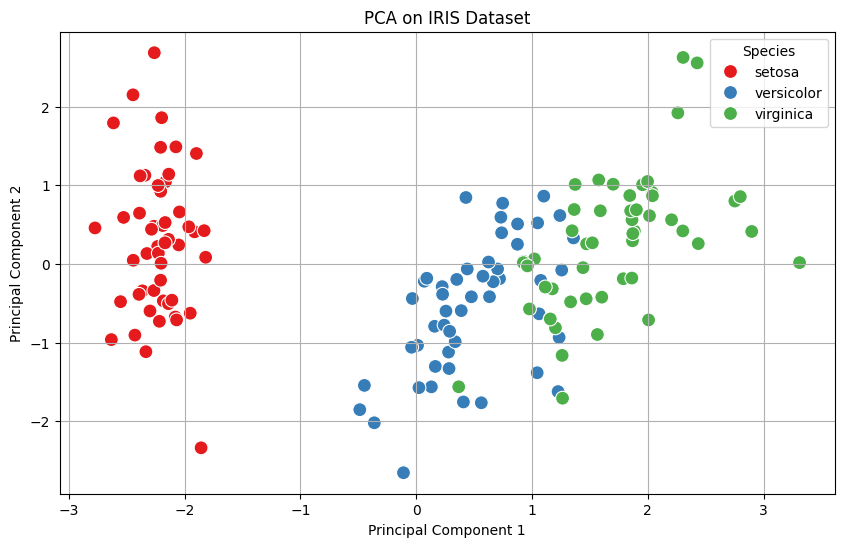

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette='Set1', s=100)
plt.title('PCA on IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Species')
plt.show()